<a href="https://colab.research.google.com/github/PrajuMaharjan/5CS037--Concepts-and-Technologies-of-AI./blob/main/Worksheet_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3 To- Do Exercise:

For the provided dataset:

• Titanic-Dataset.csv

Complete the following Problems.

Submission Instructions:

• Submit a single notebook containing:
1. Clean and well-documented code.
2. Outputs and visualizations.
3. Detailed explanations and analysis for all steps.

• Ensure all cells are executed before submission.

Problem- 1: Perform a classification task with knn from scratch.
1. Load the Dataset:

• Read the dataset into a pandas DataFrame.

• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).

2. Handle Missing Data:

• Handle any missing values appropriately, either by dropping or imputing them based on the data.

3. Feature Engineering:

• Separate the feature matrix (X) and target variable (y).

• Perform a train- test split from scratch using a 70% − 30% ratio.

4. Implement KNN:

• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).

• Compute distances using Euclidean distance.

• Write functions for:– Predicting the class for a single query.– Predicting
classes for all test samples.

• Evaluate the performance using accuracy.

Problem- 2- Experimentation:
1. Repeat the Classification Task:

• Scale the Feature matrix X.

• Use the scaled data for training and testing the kNN Classifier.

• Record the results.

2. Comparative Analysis: Compare the Results

• Compare the accuracy and performance of the kNN model on the original dataset from problem 1 versus the scaled dataset.

• Discuss:
– How scaling impacted the KNN performance.

– The reason for any observed changes in accuracy.

Problem- 3- Experimentation with k:

1. Vary the number of neighbors- k:
• Run the KNN model on both the original and scaled datasets for a range of:

                    k= 1,2,3,...15

• For each k, record:

– Accuracy.

– Time taken to make predictions.

2. Visualize the Results:

• Plot the following graphs:

– k vs. Accuracy for original and scaled datasets.

– k vs. Time Taken for original and scaled datasets.

3. Analyze and Discuss:

• Discuss how the choice of k affects the accuracy and computational cost.

• Identify the optimal k based on your analysis.

In [27]:
# 3 To- Do Exercise:
# Problem- 1: Perform a classification task with knn from scratch.
# 1. Load the Dataset:
# • Read the dataset into a pandas DataFrame.
import pandas as pd
diabetes=pd.read_csv("diabetes.csv")

# • Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
# (e.g., check data types, missing values, summary statistics).
print("First five rows of Diabetes dataset : ")
display(diabetes.head())

print("Shape of the dataset:")
print(diabetes.shape)

print("Data types of each column of the dataset : ")
print(diabetes.dtypes)

print("Missing values in each column : ")
print(diabetes.isnull().sum())

print("Summary statistics of numerical columns:")
print(diabetes.describe())


First five rows of Diabetes dataset : 


,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip,time.ppn
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,44.0,41.0,300.0


Shape of the dataset:
(403, 17)
Data types of each column of the dataset : 
id            int64
chol        float64
stab.glu      int64
hdl         float64
ratio       float64
glyhb       float64
location     object
age           int64
gender       object
height      float64
weight      float64
frame        object
bp.1s       float64
bp.1d       float64
waist       float64
hip         float64
time.ppn    float64
dtype: object
Missing values in each column : 
id           0
chol         1
stab.glu     0
hdl          1
ratio        1
glyhb       13
location     0
age          0
gender       0
height       5
weight       1
frame       12
bp.1s        5
bp.1d        5
waist        2
hip          2
time.ppn     3
dtype: int64
Summary statistics of numerical columns:
                 id        chol    stab.glu         hdl       ratio  \
count    403.000000  402.000000  403.000000  402.000000  402.000000   
mean   15978.310174  207.845771  106.672457   50.445274    4.521642   
std    11881.12

In [28]:
# 2.	Handle Missing Data:
# • Handle any missing values appropriately, either by dropping or imputing them based on the data.

for column in diabetes.columns:
  if diabetes[column].dtype=='float64':
    diabetes[column]=diabetes[column].fillna(diabetes[column].mean())
  if column=="frame":
    diabetes[column]=diabetes[column].fillna(diabetes[column].mode()[0])

print("Filled up Diabetes dataset : ")
diabetes.head()


Filled up Diabetes dataset : 


,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip,time.ppn
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,44.0,41.0,300.0


In [56]:
import numpy as np
# 3.	Feature Engineering:
# •	Separate the feature matrix (X) and target variable (y).
X=diabetes.drop(columns=["location","gender","frame"]).values
y=diabetes[["location","gender","frame"]].values
# •	Perform a train - test split from scratch using a 70% − 30% ratio.
def train_test_split_scratch(X,y,test_size=0.3,random_seed=42):
  np.random.seed(random_seed)
  indices=np.arange(X.shape[0])
  np.random.shuffle(indices)
  test_split_size=int(len(X)*test_size)
  test_indices=indices[:test_split_size]
  train_indices=indices[test_split_size:]
  X_train,X_test=X[train_indices],X[test_indices]
  y_train,y_test=y[train_indices],y[test_indices]
  return X_train,X_test,y_train,y_test

X_train,X_test,y_train,y_test=train_test_split_scratch(X,y,test_size=0.3)

print("Shape of X_train : ",X_train.shape)
print("Shape of X_test : ",X_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test : ",y_test.shape)

Shape of X_train :  (283, 14)
Shape of X_test :  (120, 14)
Shape of y_train :  (283, 3)
Shape of y_test :  (120, 3)


In [43]:
# 4.	Implement KNN:
# •	Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).
# •	Compute distances using Euclidean distance.

def euclidean_distance(point1,point2):
  if point1.shape!=point2.shape:
    raise ValueError("Points must have the same dimensions to calculate Euclidean distance.")

  distance=np.sqrt(np.sum((point1-point2)**2))
  return distance

try:
  point1=np.array([1,2])
  point2=np.array([8,9])
  ed=euclidean_distance(point1,point2)
  expected_result=9.8995
  assert np.isclose(ed,expected_result),f"Expected {expected_result}, but got {ed}."
  print("Distance between given points is ",ed)
except Exception as e:
  print("Error : ",e)


Distance between given points is  9.899494936611665


In [50]:
# •	Write functions for:
# –	Predicting the class for a single query.

def knn_predict_single(query,X_train,y_train,k=3):
  distances = [euclidean_distance(query,x)for x in X_train]
  sorted_indices=np.argsort(distances)
  nearest_indices=sorted_indices[:k]
  nearest_labels=y_train[nearest_indices]
  values,counts=np.unique(nearest_labels,return_counts=True)
  prediction=values[np.argmax(counts)]
  return prediction

try:
  query=X_test[0]
  actual_label=y_test[0]
  prediction=knn_predict_single(query,X_train,y_train,k=3)
  print("Predictions:",prediction)
  print("Actual labels :" ,actual_label)
  assert prediction in np.unique(y_train),"\nPrediction is not a valid class label."
  print("Test case passed successfully!")
except Exception as ex:
  print(f"Error : {ex}")

Predictions: 1
Actual labels : 1
Test case passed successfully!


In [51]:
# –	Predicting classes for all test samples.

def knn_predict(X_test,X_train,y_train,k=3):
  predictions=[knn_predict_single(x,X_train,y_train,k)for x in X_test]
  return np.array(predictions)
try:
  X_test_sample=X_test[:5]
  y_test_sample=y_test[:5]
  predictions=knn_predict(X_test_sample,X_train,y_train,k=3)
  print("Predictions:",predictions)
  print("Actual labels:",y_test_sample)
  assert predictions.shape==y_test_sample.shape,"The shape of predictions does not match the shape of the actual labels."
  print("Test case passed successfully!")
except Exception as e:
  print(f"Error : {e}")



Predictions: [1]
Actual labels: [1]
Test case passed successfully!


In [61]:
# Problem - 2 - Experimentation:
# 1. Repeat the Classification Task:
# •	Scale the Feature matrix X.
mean_X=X_train.mean(axis=0)
std_X=X_train.std(axis=0)

std_X[std_X==0]=1
X_train_scaled=(X_train-mean_X)/std_X
X_test_scaled=(X_test-mean_X) / std_X

# •	Use the scaled data for training and testing the kNN Classifier.
y_pred = np.array([knn_predict_single(x, X_train_scaled, y_train, k=3) for x in X_test_scaled])

# •	Record the results.
y_test = y_test.reshape(-1,1)
accuracy=np.mean(np.all(y_pred==y_test,axis=1))
print("Accuracy : ",accuracy)


Accuracy :  0.0


In [67]:
import time

diabetes["diabetic"] = (diabetes["glyhb"] >= 5.7).astype(int)

X = diabetes[["chol", "stab.glu", "hdl", "ratio", "age", "weight", "waist", "hip"]].values
y = diabetes["diabetic"].values

np.random.seed(42)
indices = np.arange(len(X))
np.random.shuffle(indices)
split_idx = int(0.7 * len(X))
train_indices = indices[:split_idx]
test_indices = indices[split_idx:]
X_train = X[train_indices]
X_test = X[test_indices]
y_train = y[train_indices]
y_test = y[test_indices]


def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def predict_single(X_train, y_train, x_test, k):
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(x_test, X_train[i])
        distances.append((dist, y_train[i]))
    distances.sort(key=lambda x: x[0])
    k_nearest = distances[:k]

    k_nearest_labels = [label for _, label in k_nearest]
    return np.bincount(k_nearest_labels).argmax()


def predict(X_train, y_train, X_test, k):
    predictions = []
    for x in X_test:
        predictions.append(predict_single(X_train, y_train, x, k))
    return np.array(predictions)


def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

def scale_data(X_train, X_test):
    min_vals = X_train.min(axis=0)
    max_vals = X_train.max(axis=0)
    range_vals = max_vals - min_vals
    range_vals[range_vals == 0] = 1

    X_train_scaled = (X_train - min_vals) / range_vals
    X_test_scaled = (X_test - min_vals) / range_vals

    return X_train_scaled, X_test_scaled


X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

k_values=[]
original_accuracies=[]
scaled_accuracies=[]
original_times=[]
scaled_times=[]

print("KNN Experiment Results (k = 1 to 15)")
print("=" * 60)
print(f"{'k':>3} | {'Original Data':^25} | {'Scaled Data':^25}")
print(f"{'':3} | {'Accuracy':^10} {'Time(ms)':^10} | {'Accuracy':^10} {'Time(ms)':^10}")
print("-" * 60)

for k in range(1, 16):
    k_values.append(k)
    # Original data
    start_time = time.time()
    y_pred_original = predict(X_train, y_train, X_test, k)
    original_time = (time.time() - start_time) * 1000  # ms
    original_acc = accuracy(y_test, y_pred_original)

    original_accuracies.append(original_acc)
    original_times.append(original_time)

    # Scaled data
    start_time = time.time()
    y_pred_scaled = predict(X_train_scaled, y_train, X_test_scaled, k)
    scaled_time = (time.time() - start_time) * 1000  # ms
    scaled_acc = accuracy(y_test, y_pred_scaled)

    scaled_accuracies.append(scaled_acc)
    scaled_times.append(scaled_time)

    # Print results
    print(f"{k:3} | {original_acc:>10.4f} {original_time:>10.2f} | "
          f"{scaled_acc:>10.4f} {scaled_time:>10.2f}")

print("=" * 60)

KNN Experiment Results (k = 1 to 15)
  k |       Original Data       |        Scaled Data       
    |  Accuracy   Time(ms)  |  Accuracy   Time(ms) 
------------------------------------------------------------
  1 |     0.7603     495.68 |     0.7521     442.88
  2 |     0.8182     468.52 |     0.7521     421.82
  3 |     0.8264     454.67 |     0.7521     465.54
  4 |     0.8512     286.22 |     0.7521     271.09
  5 |     0.8430     305.18 |     0.7521     271.23
  6 |     0.8347     273.91 |     0.7521     265.74
  7 |     0.8182     294.59 |     0.7521     272.53
  8 |     0.8430     273.06 |     0.7521     289.14
  9 |     0.8430     276.02 |     0.7521     269.86
 10 |     0.8264     278.58 |     0.7521     285.84
 11 |     0.8347     273.06 |     0.7521     272.46
 12 |     0.8347     276.26 |     0.7521     311.06
 13 |     0.8430     278.43 |     0.7521     275.71
 14 |     0.8347     281.44 |     0.7521     275.68
 15 |     0.8347     279.15 |     0.7521     269.30


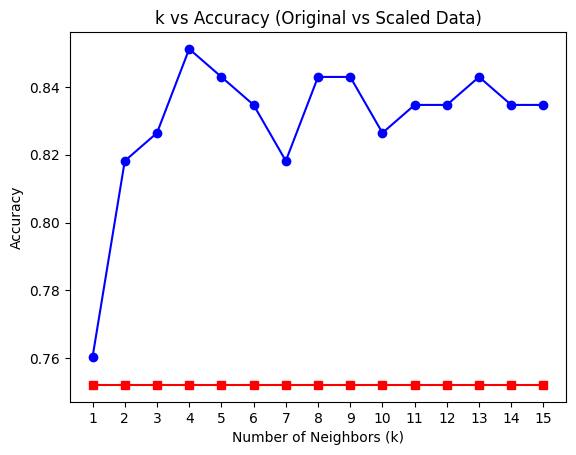

Text(0.5, 1.0, 'k vs Time taken (Original vs Scaled Data)')

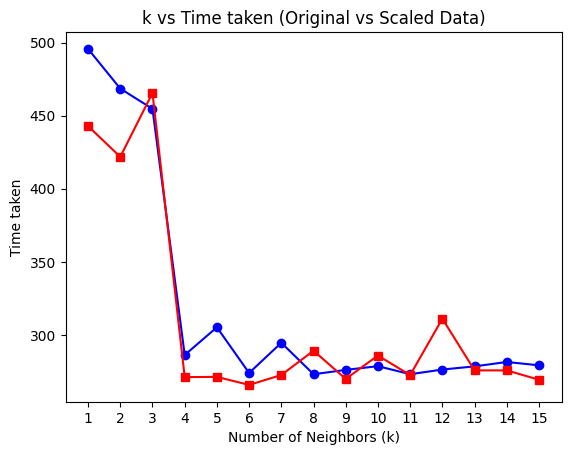

In [72]:
# . Visualize the Results:
# • Plot the following graphs:
# –	k vs. Accuracy for original and scaled datasets.
# –	k vs. Time Taken for original and scaled datasets.

import matplotlib.pyplot as plt

plt.plot(k_values, original_accuracies, color='blue', marker='o', linestyle='-', label="Original Data")
plt.plot(k_values, scaled_accuracies, color='red', marker='s', linestyle='-', label='Scaled Data')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.title('k vs Accuracy (Original vs Scaled Data)')
plt.show()

plt.plot(k_values, original_times, color='blue', marker='o', linestyle='-', label="Original Data")
plt.plot(k_values, scaled_times, color='red', marker='s', linestyle='-', label='Scaled Data')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Time taken')
plt.xticks(k_values)
plt.title('k vs Time taken (Original vs Scaled Data)')